In [358]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [359]:
housing = pd.read_csv('data.csv')

In [360]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [361]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [362]:
housing['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [363]:
%matplotlib inline

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

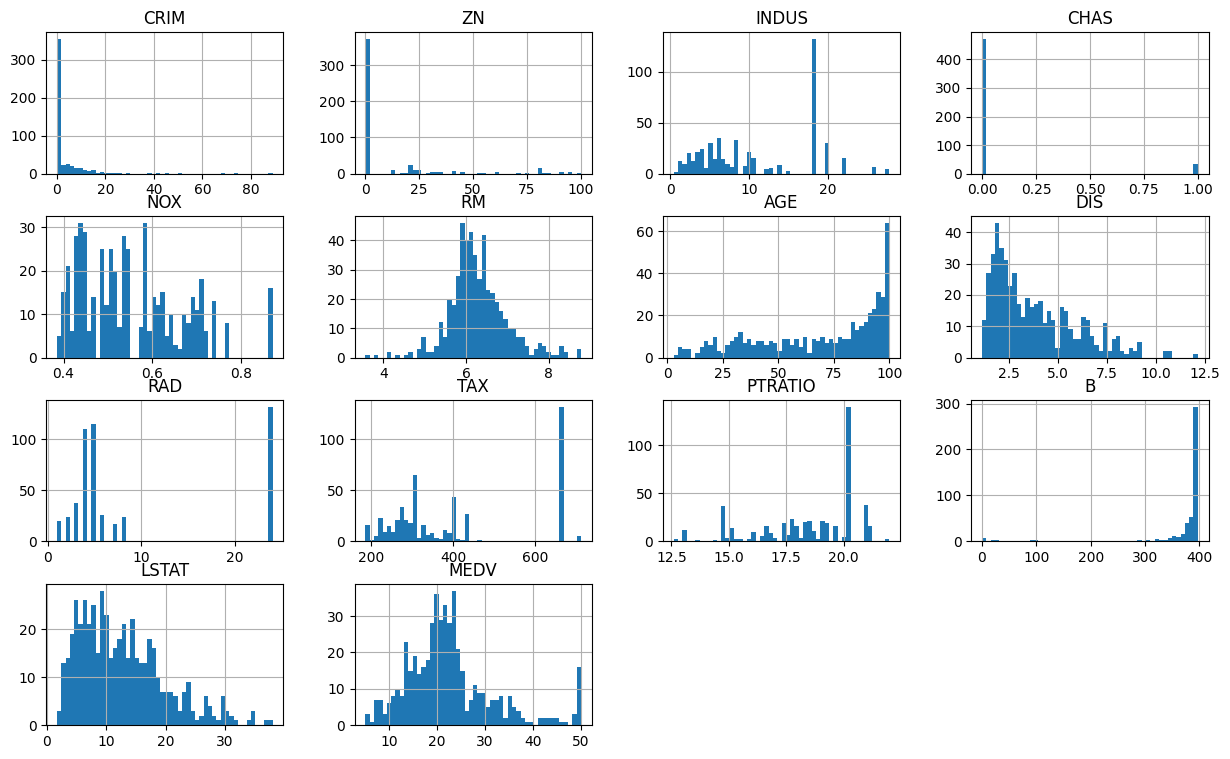

In [364]:
housing.hist(bins=50, figsize=[15,9])

In [365]:
from sklearn.model_selection import train_test_split
train_sets, test_sets = train_test_split(housing, test_size=.2, random_state=45)
print(f"no of train rows{len(train_sets)}\nno of test rows {len(test_sets)}")

no of train rows404
no of test rows 102


In [366]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2,random_state=45)
for train_points , test_points in split.split(housing,housing['CHAS']):
    train_split_sets = housing.loc[train_points]
    test_split_sets= housing.loc[test_points]



In [367]:
train_split_sets['CHAS'].value_counts()

CHAS
0    376
1     28
Name: count, dtype: int64

In [368]:
test_split_sets['CHAS'].value_counts()

CHAS
0    95
1     7
Name: count, dtype: int64

In [369]:
housing= train_split_sets.copy()


In [370]:
house_corr= housing.corr()
house_corr['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.670198
ZN         0.322580
B          0.306559
DIS        0.228136
CHAS       0.182732
AGE       -0.343107
RAD       -0.368549
CRIM      -0.391386
NOX       -0.403932
TAX       -0.453907
INDUS     -0.459745
PTRATIO   -0.493436
LSTAT     -0.735652
Name: MEDV, dtype: float64

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='AGE', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>,
        <Axes: xlabel='CRIM', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='AGE'>,
        <Axes: xlabel='AGE', ylabel='AGE'>,
        <Axes: xlabel='LSTAT', ylabel='AGE'>,
        <Axes: xlabel='CRIM', ylabel='AGE'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='AGE', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>,
        <Axes: xlabel='CRIM', ylabel='LSTAT'>],
       [<Axes: xlabel='MEDV', ylabel='CRIM'>,
        <Axes: xlabel='AGE', ylabel='CRIM'>,
        <Axes: xlabel='LSTAT', ylabel='CRIM'>,
        <Axes: xlabel='CRIM', ylabel='CRIM'>]], dtype=object)

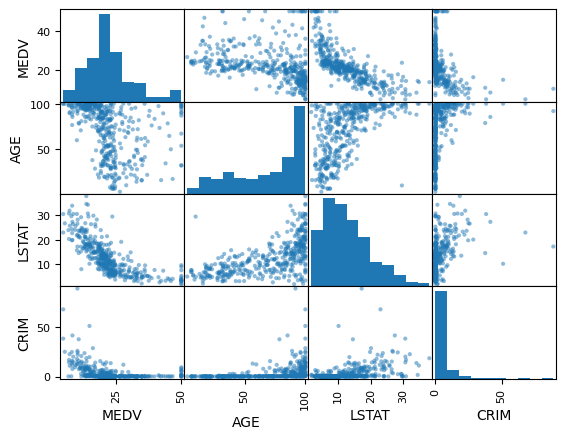

In [371]:
from pandas.plotting import scatter_matrix
attribute= ['MEDV','AGE','LSTAT','CRIM']
scatter_matrix(housing[attribute])

<Axes: xlabel='MEDV', ylabel='LSTAT'>

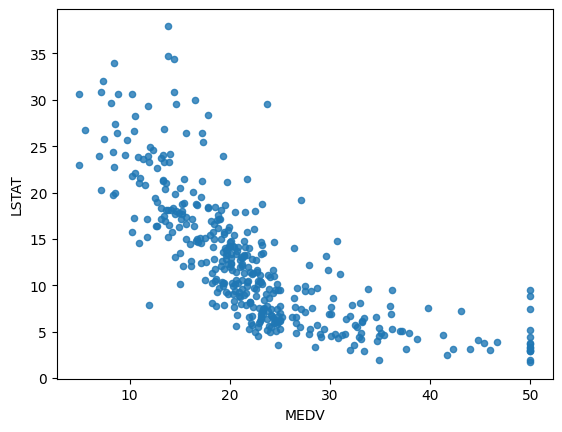

In [372]:
housing.plot('MEDV','LSTAT',kind='scatter', alpha =0.8 )

<Axes: xlabel='TAX', ylabel='RM'>

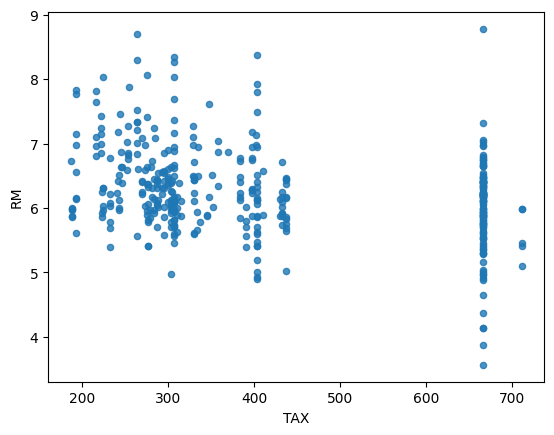

In [373]:
housing.plot('TAX','RM',kind='scatter', alpha =0.8 )

<Axes: xlabel='MEDV', ylabel='RMTAX'>

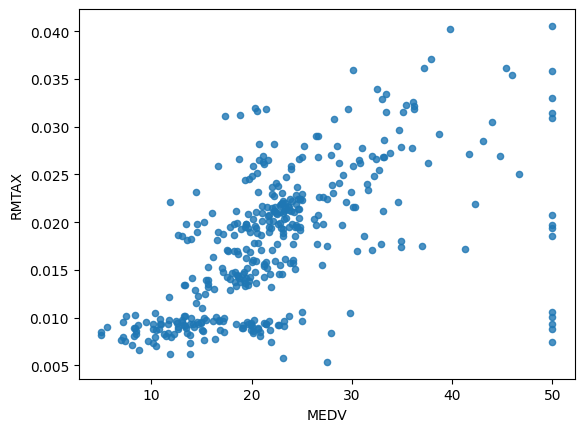

In [374]:
housing['RMTAX'] =  housing['RM']/housing['TAX']
housing.plot('MEDV','RMTAX',kind='scatter', alpha =0.8 )

In [375]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,RMTAX
197,0.04666,80.0,1.52,0,0.404,7.107,36.6,7.3090,2,329,12.6,354.31,8.61,30.3,0.021602
226,0.38214,0.0,6.20,0,0.504,8.040,86.5,3.2157,8,307,17.4,387.38,3.13,37.6,0.026189
292,0.03615,80.0,4.95,0,0.411,6.630,23.4,5.1167,4,245,19.2,396.90,4.70,27.9,0.027061
29,1.00245,0.0,8.14,0,0.538,6.674,87.3,4.2390,4,307,21.0,380.23,11.98,21.0,0.021739
246,0.33983,22.0,5.86,0,0.431,6.108,34.9,8.0555,7,330,19.1,390.18,9.16,24.3,0.018509


In [376]:
house_corr = housing.corr()
house_corr['MEDV'].sort_values()

LSTAT     -0.735652
PTRATIO   -0.493436
INDUS     -0.459745
TAX       -0.453907
NOX       -0.403932
CRIM      -0.391386
RAD       -0.368549
AGE       -0.343107
CHAS       0.182732
DIS        0.228136
B          0.306559
ZN         0.322580
RMTAX      0.603404
RM         0.670198
MEDV       1.000000
Name: MEDV, dtype: float64

In [377]:
housing = train_split_sets.drop('MEDV', axis=1)
housing_labels = train_split_sets['MEDV'].copy()

In [378]:
a = housing.dropna(subset =['RM'])
a.shape

(399, 13)

In [379]:
housing.drop(['RM'],axis= 1)

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
197,0.04666,80.0,1.52,0,0.404,36.6,7.3090,2,329,12.6,354.31,8.61
226,0.38214,0.0,6.20,0,0.504,86.5,3.2157,8,307,17.4,387.38,3.13
292,0.03615,80.0,4.95,0,0.411,23.4,5.1167,4,245,19.2,396.90,4.70
29,1.00245,0.0,8.14,0,0.538,87.3,4.2390,4,307,21.0,380.23,11.98
246,0.33983,22.0,5.86,0,0.431,34.9,8.0555,7,330,19.1,390.18,9.16
...,...,...,...,...,...,...,...,...,...,...,...,...
159,1.42502,0.0,19.58,0,0.871,100.0,1.7659,5,403,14.7,364.31,7.39
37,0.08014,0.0,5.96,0,0.499,41.5,3.9342,5,279,19.2,396.90,8.77
397,7.67202,0.0,18.10,0,0.693,98.9,1.6334,24,666,20.2,393.10,19.92
208,0.13587,0.0,10.59,1,0.489,59.1,4.2392,4,277,18.6,381.32,14.66


In [380]:
median= housing['RM'].median
housing['RM'].fillna('median')

197    7.107
226     8.04
292     6.63
29     6.674
246    6.108
       ...  
159     6.51
37      5.85
397    5.747
208    6.064
172    5.572
Name: RM, Length: 404, dtype: object

In [381]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(housing)


SimpleImputer(strategy='median')

In [382]:
X = imputer.transform(housing)

In [383]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [384]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.716923,11.110149,11.384777,0.069307,0.557979,6.253363,69.275990,3.754698,9.826733,415.282178,18.473020,360.439480,12.701312
std,8.455136,22.833976,6.930255,0.254290,0.117396,0.697775,28.280361,2.156837,8.839887,170.538323,2.150016,86.011519,7.105235
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.083545,0.000000,5.190000,0.000000,0.449000,5.874500,44.850000,2.009600,4.000000,284.000000,17.000000,375.472500,6.990000
50%,0.268880,0.000000,9.900000,0.000000,0.538000,6.193000,79.500000,3.079300,5.000000,336.000000,19.100000,391.340000,11.360000
75%,3.896877,12.500000,18.100000,0.000000,0.631000,6.594000,94.725000,5.117025,24.000000,666.000000,20.200000,396.250000,17.092500
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [385]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([('imputer', SimpleImputer(strategy = 'median' )), ("std_sca", StandardScaler())])

In [386]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [387]:
housing_num_tr

array([[-0.43462502,  3.02072976, -1.42520143, ..., -2.73500329,
        -0.07135184, -0.57653054],
       [-0.39489817, -0.48716546, -0.74906425, ..., -0.49969399,
         0.31360827, -1.34874919],
       [-0.43586959,  3.02072976, -0.92965644, ...,  0.338547  ,
         0.42442836, -1.12751136],
       ...,
       [ 0.4683545 , -0.48716546,  0.97017346, ...,  0.80423644,
         0.38019345,  1.0172273 ],
       [-0.42406096, -0.48716546, -0.11482445, ...,  0.05913334,
         0.24306523,  0.27601013],
       [-0.42367373, -0.48716546, -1.05968282, ..., -0.87224554,
         0.42442836,  0.2802376 ]])

In [388]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = DecisionTreeRegressor()
model= RandomForestRegressor()
# model = LinearRegression()
model.fit(housing_num_tr , housing_labels)


RandomForestRegressor()

In [389]:
from sklearn.metrics import mean_squared_error
predictions = model.predict(housing_num_tr )
mse = mean_squared_error(housing_labels,predictions)
rmse = np.sqrt(mse)

In [390]:
rmse

1.247054868103007

In [391]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [392]:
rmse_scores

array([2.78916232, 3.42281161, 2.56799347, 3.2687927 , 4.50767189,
       3.17553725, 2.8580353 , 4.57161939, 2.8370412 , 3.08403261])

In [393]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [394]:
print_scores(rmse_scores)

Scores: [2.78916232 3.42281161 2.56799347 3.2687927  4.50767189 3.17553725
 2.8580353  4.57161939 2.8370412  3.08403261]
Mean:  3.308269774802856
Standard deviation:  0.6602609462832374


In [399]:
from joblib import dump, load
dump(model,'DRAGON.joblib')

['DRAGON.joblib']

In [404]:
X_test = test_split_sets.drop("MEDV", axis=1)
Y_test = test_split_sets["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)


In [406]:
final_rmse

2.872763747512072

In [407]:
from joblib import dump, load
import numpy as np
model = load('Dragon.joblib') 
features = np.array([[-5.43942006, 4.12628155, -1.6165014, -0.67288841, -1.42262747,
       -11.44443979304, -49.31238772,  7.61111401, -26.0016879 , -0.5778192 ,
       -0.97491834,  0.41164221, -66.86091034]])
model.predict(features)

array([24.341])